In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv('../model1/combind_data_new.tsv', delimiter='\t',names=["chr","pos","ref","alt","log_counts_diff","log_probs_diff_abs_sum","probs_jsd_diff"])
df2 = pd.read_csv('../model2/combind_data_new.tsv', delimiter='\t',names=["chr","pos","ref","alt","log_counts_diff","log_probs_diff_abs_sum","probs_jsd_diff"])
df3 = pd.read_csv('../model3/combind_data_new.tsv', delimiter='\t',names=["chr","pos","ref","alt","log_counts_diff","log_probs_diff_abs_sum","probs_jsd_diff"])
df4 = pd.read_csv('../model4/combind_data_new.tsv', delimiter='\t',names=["chr","pos","ref","alt","log_counts_diff","log_probs_diff_abs_sum","probs_jsd_diff"])

In [3]:
df2

,chr,pos,ref,alt,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff
0,chr1,13273,G,C,-0.002619,-41.121384,-0.028108
1,chr1,13349,G,T,-0.002503,-12.664446,-0.010369
2,chr1,15849,C,T,0.005022,10.600307,0.011766
3,chr1,15913,G,A,0.000357,8.780392,0.009432
4,chr1,15922,A,G,-0.005608,-13.068850,-0.012631
...,...,...,...,...,...,...,...
50290398,chr22,50807457,C,G,-0.003990,-28.818295,-0.018606
50290399,chr22,50807539,C,G,-0.001250,-6.403407,-0.011155
50290400,chr22,50807550,G,C,0.001429,7.503496,0.016695
50290401,chr22,50807831,G,T,0.002492,12.488306,0.012620


In [7]:
# Assuming 'your_column' is the column you want to analyze
# Replace 'your_column' with the actual column name in your DataFrame
# Replace 'your_dataframe' with the actual DataFrame name

# Calculate mean and standard deviation
mean_value = df4['log_counts_diff'].mean()
std_dev = df4['log_counts_diff'].std()

# Identify variants greater than 3 standard deviations from the mean
upper_threshold = mean_value + 3 * std_dev
#lower_threshold = mean_value - 3 * std_dev

outliers = df4[
    (df4['log_counts_diff'] > upper_threshold)
]

# Get all columns for the identified outliers
all_columns_for_outliers = outliers.loc[:, :]

# Print or further process the DataFrame with all columns for outliers
#print("Outliers with all columns:")
#print(all_columns_for_outliers)
all_columns_for_outliers.to_csv('model4/varients_info_m4_new.txt', index=None, sep="\t") 

In [18]:
# Assuming 'your_column' is the column you want to analyze
# Replace 'your_column' with the actual column name in your DataFrame
# Replace 'your_dataframe' with the actual DataFrame name

# Calculate mean and standard deviation
mean_value = df1['log_counts_diff'].mean()
std_dev = df1['log_counts_diff'].std()

# Identify variants greater than 3 standard deviations from the mean
upper_threshold = mean_value + 3 * std_dev
lower_threshold = mean_value - 3 * std_dev

outliers = df1[
    (df1['log_counts_diff'] > upper_threshold) | (df1['log_counts_diff'] < lower_threshold)
]

# Get all columns for the identified outliers
all_columns_for_outliers = outliers.loc[:, :]

# Print or further process the DataFrame with all columns for outliers
#print("Outliers with all columns:")
#print(all_columns_for_outliers)

In [19]:
all_columns_for_outliers

,chr,pos,ref,alt,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff
137,chr1,58814,G,A,-0.015540,-173.665800,-0.096210
138,chr1,58834,C,T,-0.015548,-147.714360,-0.082239
180,chr1,62738,T,C,0.017499,138.464720,0.085308
270,chr1,74091,C,T,-0.016102,-90.602220,-0.051443
321,chr1,77501,C,T,-0.020597,-127.428740,-0.065369
...,...,...,...,...,...,...,...
50289645,chr22,50753312,G,A,-0.015741,-188.831560,-0.103766
50289692,chr22,50755794,G,A,-0.018216,-95.765045,-0.048609
50289781,chr22,50758504,G,A,-0.017159,-68.886795,-0.024110
50290013,chr22,50773329,C,T,-0.018714,-97.298065,-0.045253


In [20]:
all_columns_for_outliers.to_csv('model1/varients_info_m1.txt', index=None, sep="\t") 

In [22]:
#variant_info_list = outliers[['chr', 'pos', 'ref', 'alt']].apply(lambda x: '_'.join(x.astype(str)), axis=1).tolist()
# variant_info_list = outliers[['chr', 'pos', 'ref', 'alt']].values.tolist()
variant_tuples_list = list(zip(outliers['chr'], outliers['pos'], outliers['ref'], outliers['alt']))


In [24]:
variant_tuples_list

[('chr1', 58814, 'G', 'A'),
 ('chr1', 58834, 'C', 'T'),
 ('chr1', 62738, 'T', 'C'),
 ('chr1', 74091, 'C', 'T'),
 ('chr1', 77501, 'C', 'T'),
 ('chr1', 77502, 'A', 'G'),
 ('chr1', 81260, 'C', 'T'),
 ('chr1', 83640, 'C', 'T'),
 ('chr1', 86065, 'G', 'C'),
 ('chr1', 281379, 'G', 'A'),
 ('chr1', 599166, 'T', 'C'),
 ('chr1', 630211, 'C', 'T'),
 ('chr1', 667424, 'C', 'T'),
 ('chr1', 682421, 'C', 'T'),
 ('chr1', 687482, 'G', 'C'),
 ('chr1', 790437, 'G', 'A'),
 ('chr1', 791069, 'T', 'C'),
 ('chr1', 792779, 'C', 'T'),
 ('chr1', 796652, 'A', 'C'),
 ('chr1', 812586, 'G', 'A'),
 ('chr1', 814137, 'C', 'T'),
 ('chr1', 833171, 'G', 'A'),
 ('chr1', 849370, 'C', 'T'),
 ('chr1', 868155, 'T', 'C'),
 ('chr1', 869379, 'C', 'T'),
 ('chr1', 874457, 'C', 'T'),
 ('chr1', 883806, 'T', 'C'),
 ('chr1', 894725, 'T', 'C'),
 ('chr1', 911869, 'A', 'G'),
 ('chr1', 988951, 'T', 'C'),
 ('chr1', 989125, 'C', 'T'),
 ('chr1', 989165, 'T', 'C'),
 ('chr1', 1020073, 'C', 'T'),
 ('chr1', 1097910, 'T', 'C'),
 ('chr1', 1099116, 'G

In [21]:
# with open('variant_info.txt', 'w') as file:
#     for variant_info in variant_info_list:
#         file.write(f"{variant_info}\n")

In [25]:
with open('variants_to_extract.txt', 'w') as file:
    for variant_tuple in variant_tuples_list:
        file.write(f"{variant_tuple[0]}\t{variant_tuple[1]}\t{variant_tuple[2]}\t{variant_tuple[3]}\n")


In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df1 and df2 are your data frames
# # Assuming 'column_name' is the column you want to compare

# # Plotting histograms
# plt.figure(figsize=(10, 6))

# sns.distplot(df1['dis'], kde=True, label='CNS', color='blue')

# sns.distplot(df2['dis'], kde=True, label='Liver', color='orange')

# sns.distplot(df3['dis'], kde=True, label='Lung', color='red')

# sns.distplot(df4['dis'], kde=True, label='Brain', color='green')

# # Adding labels and title
# plt.xlim([-0.05, 0.05])
# plt.xlabel('')
# plt.ylabel('Frequency')
# plt.title('')
# plt.legend()

# # Display the plot
# plt.show()

/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

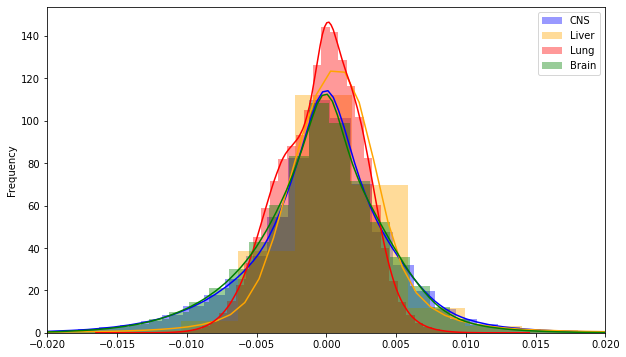

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and df2 are your data frames
# Assuming 'column_name' is the column you want to compare

# Plotting histograms
plt.figure(figsize=(10, 6))

sns.distplot(df1['log_counts_diff'], kde=True, label='CNS', color='blue')

sns.distplot(df2['log_counts_diff'], kde=True, label='Liver', color='orange')

sns.distplot(df3['log_counts_diff'], kde=True, label='Lung', color='red')

sns.distplot(df4['log_counts_diff'], kde=True, label='Brain', color='green')

# Adding labels and title
plt.xlim([-0.02, 0.02])
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('')
plt.legend()

# Display the plot
plt.show()

/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

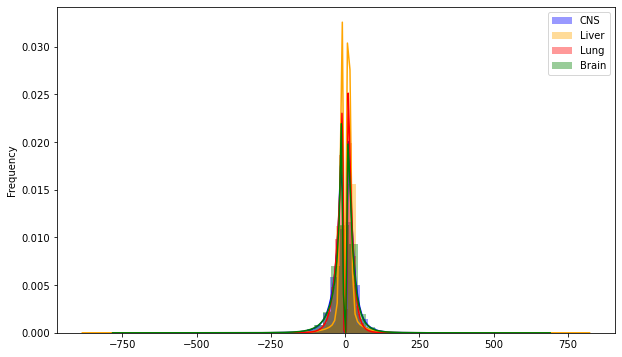

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and df2 are your data frames
# Assuming 'column_name' is the column you want to compare

# Plotting histograms
plt.figure(figsize=(10, 6))

sns.distplot(df1['log_probs_diff_abs_sum'], kde=True, label='CNS', color='blue')

sns.distplot(df2['log_probs_diff_abs_sum'], kde=True, label='Liver', color='orange')

sns.distplot(df3['log_probs_diff_abs_sum'], kde=True, label='Lung', color='red')

sns.distplot(df4['log_probs_diff_abs_sum'], kde=True, label='Brain', color='green')

# Adding labels and title
#plt.xlim([-250, 250])
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('')
plt.legend()

# Display the plot
plt.show()

/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/apps/codes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

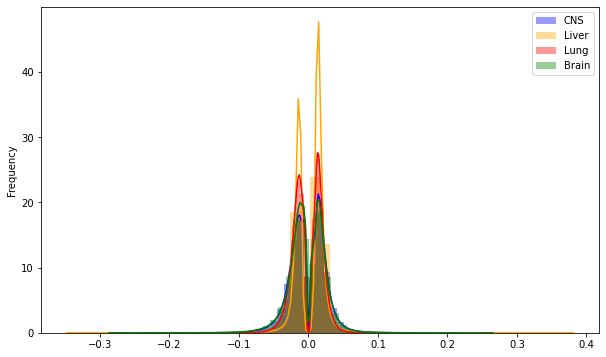

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and df2 are your data frames
# Assuming 'column_name' is the column you want to compare

# Plotting histograms
plt.figure(figsize=(10, 6))

sns.distplot(df1['probs_jsd_diff'], kde=True, label='CNS', color='blue')

sns.distplot(df2['probs_jsd_diff'], kde=True, label='Liver', color='orange')

sns.distplot(df3['probs_jsd_diff'], kde=True, label='Lung', color='red')

sns.distplot(df4['probs_jsd_diff'], kde=True, label='Brain', color='green')

# Adding labels and title
#plt.xlim([-0.02, 0.02])
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('')
plt.legend()

# Display the plot
plt.show()

In [4]:
# # Create a list of substrings to check against
# excluded_chr = ["chr2", "chr3", "chr4", "chr7", "chr9", "chr12"]

# # Use the isin() method to check if "chr" column contains any of the substrings
# df10 = df1[~df1["chr"].isin(excluded_chr)]


# # Use the isin() method to check if "chr" column contains any of the substrings
# df20 = df2[~df2["chr"].isin(excluded_chr)]

# df30 = df3[~df3["chr"].isin(excluded_chr)]

# df40 = df4[~df4["chr"].isin(excluded_chr)]

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df1 and df2 are your data frames
# # Assuming 'column_name' is the column you want to compare

# # Plotting histograms
# plt.figure(figsize=(10, 6))

# sns.distplot(df10['dis'], kde=True, label='CNS', color='blue')

# sns.distplot(df20['dis'], kde=True, label='Liver', color='orange')

# sns.distplot(df30['dis'], kde=True, label='Lung', color='red')

# sns.distplot(df40['dis'], kde=True, label='Brain', color='green')

# # Adding labels and title
# plt.xlim([-0.02, 0.02])
# plt.xlabel('')
# plt.ylabel('Frequency')
# plt.title('')
# plt.legend()

# # Display the plot
# plt.show()

In [8]:
df1.describe()

,pos,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff
count,5.029040e+07,5.029040e+07,5.029040e+07,5.029040e+07
mean,7.840600e+07,-3.762241e-04,-3.075432e+00,-1.121713e-03
std,5.604101e+07,5.051158e-03,4.123599e+01,2.506275e-02
min,1.007500e+04,-3.890514e-02,-6.626984e+02,-2.351920e-01
25%,3.270930e+07,-2.866268e-03,-2.404706e+01,-1.764325e-02
50%,6.826743e+07,-1.454353e-04,-8.132076e+00,-3.236900e-03
75%,1.142230e+08,2.408266e-03,2.036342e+01,1.669846e-02
max,2.489454e+08,3.645682e-02,6.125134e+02,2.414714e-01


In [9]:
df2.describe()

,pos,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff
count,5.029040e+07,5.029040e+07,5.029040e+07,5.029040e+07
mean,7.840600e+07,6.636027e-04,2.860606e+00,2.761698e-03
std,5.604101e+07,4.485762e-03,2.721288e+01,1.959427e-02
min,1.007500e+04,-1.038613e-01,-8.821354e+02,-3.466353e-01
25%,3.270930e+07,-1.583576e-03,-1.216967e+01,-1.385054e-02
50%,6.826743e+07,6.115437e-04,8.639759e+00,1.069438e-02
75%,1.142230e+08,2.745390e-03,1.487437e+01,1.607661e-02
max,2.489454e+08,9.934628e-02,8.202300e+02,3.798063e-01


In [10]:
df3.describe()

,pos,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff
count,5.029040e+07,5.029040e+07,5.029040e+07,5.029040e+07
mean,7.840600e+07,-3.690276e-04,-2.772566e+00,-1.315147e-03
std,5.604101e+07,2.947146e-03,2.876186e+01,1.991857e-02
min,1.007500e+04,-1.626420e-02,-3.774827e+02,-1.448963e-01
25%,3.270930e+07,-2.403974e-03,-2.036460e+01,-1.635101e-02
50%,6.826743e+07,-1.339912e-04,-7.162549e+00,-4.633758e-03
75%,1.142230e+08,1.715660e-03,1.674694e+01,1.492727e-02
max,2.489454e+08,1.429653e-02,3.107971e+02,1.434191e-01


In [11]:
df4.describe()

,pos,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff
count,5.029040e+07,5.029040e+07,5.029040e+07,5.029040e+07
mean,7.840600e+07,-5.468471e-04,-4.001845e+00,-1.757292e-03
std,5.604101e+07,4.812538e-03,4.205261e+01,2.552797e-02
min,1.007500e+04,-3.711843e-02,-7.791134e+02,-2.846912e-01
25%,3.270930e+07,-3.123760e-03,-2.220616e+01,-1.729985e-02
50%,6.826743e+07,-2.813339e-04,-8.406530e+00,-4.297243e-03
75%,1.142230e+08,2.314329e-03,1.853294e+01,1.621796e-02
max,2.489454e+08,3.470016e-02,6.864458e+02,2.630882e-01


In [14]:
np.std(df20["dis"])

0.004447774803291832

In [15]:
np.std(df30["dis"])

0.0029219300767155884

In [16]:
np.std(df40["dis"])

0.004777085240303365

In [13]:
np.mean(df10["dis"])

-0.000338316865634421

In [17]:
np.mean(df20["dis"])

0.0006741726129716881

In [18]:
np.mean(df30["dis"])

-0.00034656023491407955

In [19]:
np.mean(df40["dis"])

-0.0005000378111874003